In [2]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/engineering-placements-prediction/collegePlace.csv


In [4]:
df=pd.read_csv("../input/engineering-placements-prediction/collegePlace.csv")
df.head(10).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [5]:
#The shape of the dataset.....
df.shape

(2966, 8)

In [6]:
#The dimensions of the dataset.......
df.ndim

2

In [7]:
#The size of the dataset.......
df.size

23728

In [8]:
#The columns we have in the dataset.....
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [9]:
#The dtypes we have in the dataset.....
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [10]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [12]:
df.duplicated().sum()

1829

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.skew()


Age                  0.817990
Internships          0.697572
CGPA                 0.122766
Hostel               0.699651
HistoryOfBacklogs    0.892883
PlacedOrNot         -0.322920
dtype: float64

In [15]:
# statistics on Categorical data......
round(df.describe(exclude = 'object'), 2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,21.640000,0.850000,6.990000,0.340000,0.300000,0.580000
std,1.720000,0.830000,1.070000,0.470000,0.460000,0.490000
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,1.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [16]:
# statistics on numerical data
round(df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Gender,Stream
count,1137,1137
unique,2,6
top,Male,Computer Science
freq,846,243


In [17]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')

print('Numeric Column name',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of numerical variables:  6


Numeric Column name ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']




,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


In [19]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Age'}}
multi_table([ df_nunique['Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,Age
21,302
22,282
20,172
23,123
19,106
24,83
26,42
25,22
28,3
30,1


In [20]:
print('Maximum age of the students:',df['Age'].max())
print('Manimum age of the students:',df['Age'].min())
print('Average age of the students:',df['Age'].mean())

Maximum age of the students: 30
Manimum age of the students: 19
Average age of the students: 21.641160949868073


In [54]:
# Changing the Gender to 0 and 1 (Hidden Input/Output)
df["Gender"] = df["Gender"].map({"Male":1, "Female":0})

In [55]:
df.drop(['Age'], axis = 1,inplace = True)

In [56]:
df.head(5).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Student_Age
0,1,Electronics And Communication,1,8,1,1,1,0
1,0,Computer Science,0,7,1,1,1,0
2,0,Information Technology,1,6,0,0,1,0
3,1,Information Technology,0,8,0,1,1,0
4,1,Mechanical,0,8,1,0,1,0


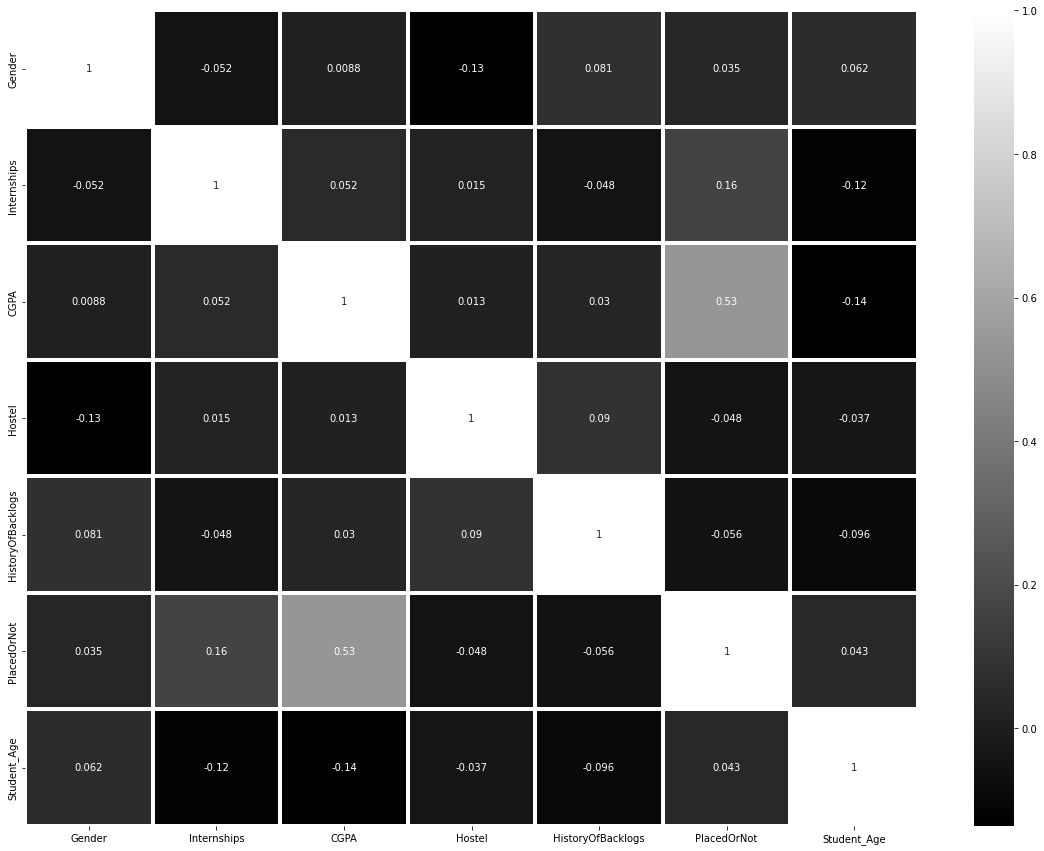

In [58]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="gist_yarg_r",linewidths=3.5,
    linecolor='white')

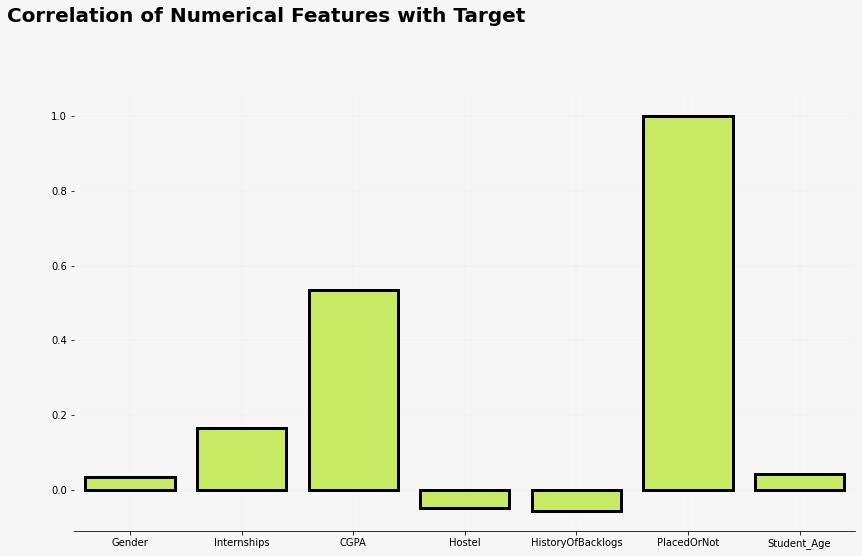

In [59]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(14,8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#c6ff1a"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['PlacedOrNot']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#d2ff4d', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [60]:
#Converting categorical into numeric.
dummy_stream = pd.get_dummies(df['Stream'])

In [61]:
df = pd.concat([df.drop(["Stream"], axis = 1),dummy_stream], axis = 1)

df.head(5).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Student_Age,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,1,8,1,1,1,0,0,0,0,1,0,0
1,0,0,7,1,1,1,0,0,1,0,0,0,0
2,0,1,6,0,0,1,0,0,0,0,0,1,0
3,1,0,8,0,1,1,0,0,0,0,0,1,0
4,1,0,8,1,0,1,0,0,0,0,0,0,1


In [62]:
#Rearrange columns
df = df[['Student_Age','Gender','Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology',
       'Mechanical', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs','PlacedOrNot']]

df.head(5).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Student_Age,Gender,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0,1,0,0,0,1,0,0,1,8,1,1,1
1,0,0,0,1,0,0,0,0,0,7,1,1,1
2,0,0,0,0,0,0,1,0,1,6,0,0,1
3,0,1,0,0,0,0,1,0,0,8,0,1,1
4,0,1,0,0,0,0,0,1,0,8,1,0,1


In [63]:
scaler = StandardScaler()

scaler.fit(df.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(df.drop('PlacedOrNot',axis=1))

In [64]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Student_Age,Gender,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Internships,CGPA,Hostel,HistoryOfBacklogs
0,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,2.352548,-0.521356,-0.412011,0.178784,0.947780,1.408635,1.540742
1,-0.558516,-1.705056,-0.392829,1.918075,-0.404681,-0.425071,-0.521356,-0.412011,-1.024040,0.010714,1.408635,1.540742
2,-0.558516,-1.705056,-0.392829,-0.521356,-0.404681,-0.425071,1.918075,-0.412011,0.178784,-0.926352,-0.709907,-0.649038
3,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,-0.425071,1.918075,-0.412011,-1.024040,0.947780,-0.709907,1.540742
4,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,-0.425071,-0.521356,2.427120,-1.024040,0.947780,1.408635,-0.649038


In [65]:
X = scaled_features
y = df['PlacedOrNot']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [67]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.792386        0.039934  RandomForestClassifier
1              0.786111        0.042556      AdaBoostClassifier
2              0.737184        0.055406       Gradient Boosting
3              0.740896        0.045384    ExtraTreesClassifier
4              0.738359        0.053756  DecisionTreeClassifier


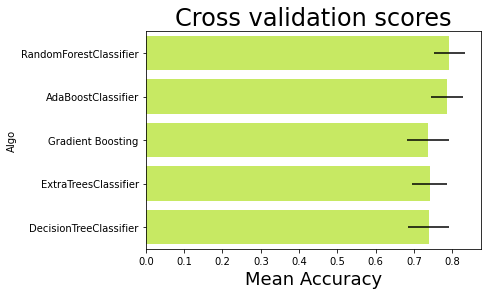

<Figure size 864x576 with 0 Axes>

In [69]:
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#d2ff4d')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred)

array([[120,  33],
       [ 53, 136]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.74       153
           1       0.80      0.72      0.76       189

    accuracy                           0.75       342
   macro avg       0.75      0.75      0.75       342
weighted avg       0.76      0.75      0.75       342



In [73]:
print(accuracy_score(y_test, y_pred))

0.7485380116959064


In [79]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 180}
0.7850632911392406
